# Atlanta Police Department
![APD Logo](https://atlantapd.galls.com/photos/partners/atlantapd/logo.jpg)


The Atlanta Police Department provides Part 1 crime data at http://www.atlantapd.org/i-want-to/crime-data-downloads

A recent copy of the data file is stored in the cluster. <span style="color: red; font-weight: bold;">Please, do not copy this data file into your home directory!</span>

# Introduction


- This notebooks leads into an exploration of public crime data provided by the Atlanta Police Department.
- The original data set and supplemental information can be found at http://www.atlantapd.org/i-want-to/crime-data-downloads
- **The data set is available on ARC, please, don't download into your home directory on ARC!**

In [61]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [62]:
# load data set
df = pd.read_csv('/home/data/APD/COBRA-YTD2017.csv.gz')
print "Shape of table: ", df.shape

Shape of table:  (17425, 23)


## Creating a data key

Let's look at the structure of this table. We're actually creating some text output that can be used to create a data dictionary.

In [63]:
dataDict = pd.DataFrame({'DataType': df.dtypes.values, 'Description': '', }, index=df.columns.values)

We need to enter the descriptions for each entry in our dictionary manually...

In [64]:
dataDict.loc['MI_PRINX'].Description = '' # type: int64
dataDict.loc['offense_id'].Description = 'Unique ID in the format YYDDDNNNN with the year YY, the day of the year DDD and a counter NNNN' # type: int64
dataDict.loc['rpt_date'].Description = 'Date the crime was reported' # type: object
dataDict.loc['occur_date'].Description = 'Estimated date when the crime occured' # type: object
dataDict.loc['occur_time'].Description = 'Estimated time when the crime occured' # type: object
dataDict.loc['poss_date'].Description = '' # type: object
dataDict.loc['poss_time'].Description = '' # type: object
dataDict.loc['beat'].Description = '' # type: int64
dataDict.loc['apt_office_prefix'].Description = '' # type: object
dataDict.loc['apt_office_num'].Description = '' # type: object
dataDict.loc['location'].Description = '' # type: object
dataDict.loc['MinOfucr'].Description = '' # type: int64
dataDict.loc['MinOfibr_code'].Description = '' # type: object
dataDict.loc['dispo_code'].Description = '' # type: object
dataDict.loc['MaxOfnum_victims'].Description = '' # type: float64
dataDict.loc['Shift'].Description = 'Zones have 8 or 10 hour shifts' # type: object
dataDict.loc['Avg Day'].Description = '' # type: object
dataDict.loc['loc_type'].Description = '' # type: float64
dataDict.loc['UC2 Literal'].Description = '' # type: object
dataDict.loc['neighborhood'].Description = '' # type: object
dataDict.loc['npu'].Description = '' # type: object
dataDict.loc['x'].Description = '' # type: float64
dataDict.loc['y'].Description = '' # type: float64
dataDict.to_csv("COBRA_Data_Dictionary.csv")

## What is object

Let's take a look at what we've got...

In [65]:
dataDict

,DataType,Description
MI_PRINX,int64,
offense_id,int64,Unique ID in the format YYDDDNNNN with the yea...
rpt_date,object,Date the crime was reported
occur_date,object,Estimated date when the crime occured
occur_time,object,Estimated time when the crime occured
poss_date,object,
poss_time,object,
beat,int64,
apt_office_prefix,object,
apt_office_num,object,


What is "object?"

In [238]:
print df.groupby("Shift").count().index

Index([u'Day', u'Eve', u'Morn', u'Unk'], dtype='object', name=u'Shift')


This shows that "shift" is a unicode string...

## Date and Time
- Working with dates can be tricky. Often dates and times are coded as strings and need to be converted to a date and time data format.
- Python provides a module `datetime` to deal with converting parsing and formatting dates and times. See https://docs.python.org/2/library/datetime.html
- The `pandas` package provides functionality to convert text fields into date/time fields...given the values adhere to a given format. See http://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.to_datetime.html

### Create a proper text field
In order to use the text to date/time converter our text columns need to have the appropriate format.

In [67]:
# function currying
def fixdatetime(fld):
    def _fix(s):
        date_col = '%s_date' % fld
        time_col = '%s_time' % fld
        if time_col in s.index:
            return str(s[date_col])+' '+str(s[time_col])
        else:
            return str(s[date_col])+' 00:00:00'
    return _fix

df.apply(fixdatetime('rpt'), axis=1)[:10]

0    09/06/2017 00:00:00
1    09/06/2017 00:00:00
2    09/06/2017 00:00:00
3    09/06/2017 00:00:00
4    09/06/2017 00:00:00
5    09/06/2017 00:00:00
6    09/06/2017 00:00:00
7    09/06/2017 00:00:00
8    09/06/2017 00:00:00
9    09/06/2017 00:00:00
dtype: object

## Convert Time Columns

Please refer to the following resources for working with time series data in pandas:
- https://pandas.pydata.org/pandas-docs/stable/timeseries.html
- https://pandas.pydata.org/pandas-docs/stable/api.html#id10

In [68]:
for col in ['rpt', 'occur', 'poss']:
    datser = df.apply(fixdatetime(col), axis=1)
    df['%s_dt'%col] = pd.to_datetime(datser, format="%m/%d/%Y %H:%M:%S", errors='coerce')

In [69]:
df.head()

,MI_PRINX,offense_id,rpt_date,occur_date,occur_time,poss_date,poss_time,beat,apt_office_prefix,apt_office_num,...,Avg Day,loc_type,UC2 Literal,neighborhood,npu,x,y,rpt_dt,occur_dt,poss_dt
0,7693210,172490115,09/06/2017,09/06/2017,00:30:00,09/06/2017,00:35:00,607,NaN,NaN,...,Wed,NaN,AGG ASSAULT,Custer/McDonough/Guice,W,-84.35850,33.70839,2017-09-06,2017-09-06 00:30:00,2017-09-06 00:35:00
1,7693211,172490265,09/06/2017,09/05/2017,11:15:00,09/06/2017,02:30:00,512,NaN,NaN,...,Tue,99.0,LARCENY-FROM VEHICLE,Downtown,M,-84.39736,33.74958,2017-09-06,2017-09-05 11:15:00,2017-09-06 02:30:00
2,7693212,172490322,09/06/2017,09/06/2017,03:15:00,09/06/2017,03:45:00,501,NaN,NaN,...,Wed,18.0,LARCENY-FROM VEHICLE,Atlantic Station,E,-84.39776,33.79072,2017-09-06,2017-09-06 03:15:00,2017-09-06 03:45:00
3,7693213,172490390,09/06/2017,09/05/2017,17:45:00,09/06/2017,04:57:00,207,NaN,NaN,...,Tue,18.0,LARCENY-FROM VEHICLE,Brookwood Hills,E,-84.39361,33.80774,2017-09-06,2017-09-05 17:45:00,2017-09-06 04:57:00
4,7693214,172490401,09/06/2017,09/05/2017,17:00:00,09/06/2017,05:00:00,203,NaN,NaN,...,Tue,18.0,LARCENY-FROM VEHICLE,Hills Park,D,-84.43337,33.79848,2017-09-06,2017-09-05 17:00:00,2017-09-06 05:00:00


What's the date range of the data?

In [74]:
print df.occur_dt.min(), '---', df.occur_dt.max()

2017-01-01 00:00:00 --- 2017-09-06 20:50:00


Actual years from which we have data...

In [71]:
sorted(df.occur_dt.map(lambda d: d.year).unique())

[1916.0, 2008.0, 2010.0, 2011.0, 2012.0, 2013.0, 2015.0, 2016.0, 2017.0, nan]

This is an odd assortment of years... let's look at number of crimes reported each year

In [72]:
# resample is like "groupby" for time
df.resample('A-DEC', closed='left', on='occur_dt').offense_id.count()
# df['Year'] = df.occur_dt.map(lambda d: d.year)
# df2 = df[(df.Year>=2010) & (df.Year<=2017)]
# df2.shape, df.shape

occur_dt
1916-12-31        1
1917-12-31        0
1918-12-31        0
1919-12-31        0
1920-12-31        0
1921-12-31        0
1922-12-31        0
1923-12-31        0
1924-12-31        0
1925-12-31        0
1926-12-31        0
1927-12-31        0
1928-12-31        0
1929-12-31        0
1930-12-31        0
1931-12-31        0
1932-12-31        0
1933-12-31        0
1934-12-31        0
1935-12-31        0
1936-12-31        0
1937-12-31        0
1938-12-31        0
1939-12-31        0
1940-12-31        0
1941-12-31        0
1942-12-31        0
1943-12-31        0
1944-12-31        0
1945-12-31        0
              ...  
1988-12-31        0
1989-12-31        0
1990-12-31        0
1991-12-31        0
1992-12-31        0
1993-12-31        0
1994-12-31        0
1995-12-31        0
1996-12-31        0
1997-12-31        0
1998-12-31        0
1999-12-31        0
2000-12-31        0
2001-12-31        0
2002-12-31        0
2003-12-31        0
2004-12-31        0
2005-12-31        0
2006-12-31 

Looks like most of the data is actually from 2017! Let's throw the rest away...

In [75]:
df = df[df.occur_dt>='01/01/2017']

# Time Series and Plotting
The Pandas package provides a number of plotting features. Let's try them out.
- https://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-plotting
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html


### What time of day do different types of crimes most often occur at?

Types of crimes in the database:

In [77]:
print "\n".join(sorted(df['UC2 Literal'].unique()))

AGG ASSAULT
AUTO THEFT
BURGLARY-NONRES
BURGLARY-RESIDENCE
HOMICIDE
LARCENY-FROM VEHICLE
LARCENY-NON VEHICLE
RAPE
ROBBERY-COMMERCIAL
ROBBERY-PEDESTRIAN
ROBBERY-RESIDENCE


In [107]:
df['oct'] = pd.to_timedelta(df.occur_time) # estimated time of ocurence in timedelta format

In [123]:
# Let's take a closer look at a few selected examples of crime...
vehicle_larceny = df[df['UC2 Literal']=='LARCENY-FROM VEHICLE'].resample('1H', closed='right', on='oct').offense_id.count()
pedestrian_robbery = df[df['UC2 Literal']=='ROBBERY-PEDESTRIAN'].resample('1H', closed='right', on='oct').offense_id.count()
residence_burglary = df[df['UC2 Literal']=='BURGLARY-RESIDENCE'].resample('1H', closed='right', on='oct').offense_id.count()
assault = df[df['UC2 Literal']=='AGG ASSAULT'].resample('1H', closed='right', on='oct').offense_id.count()

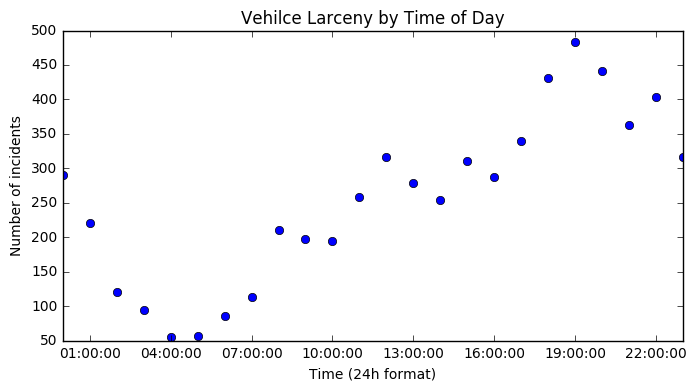

In [148]:
fig = plt.figure(figsize=(8,4));
plt.plot_date(vehicle_larceny.index, vehicle_larceny.values);
plt.title('Vehilce Larceny by Time of Day');
plt.xlabel('Time (24h format)');
plt.ylabel('Number of incidents');

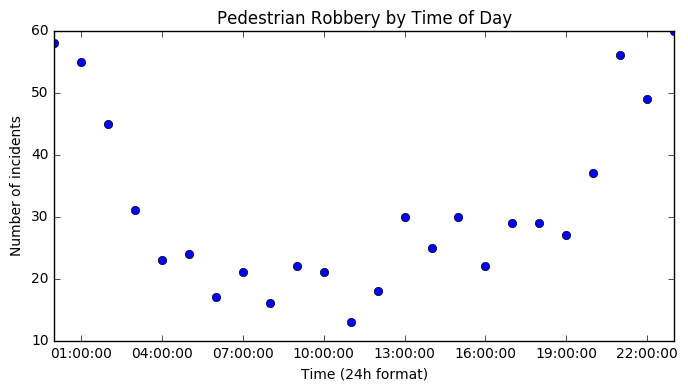

In [147]:
fig = plt.figure(figsize=(8,4));
plt.plot_date(pedestrian_robbery.index, pedestrian_robbery.values);
plt.title('Pedestrian Robbery by Time of Day');
plt.xlabel('Time (24h format)');
plt.ylabel('Number of incidents');

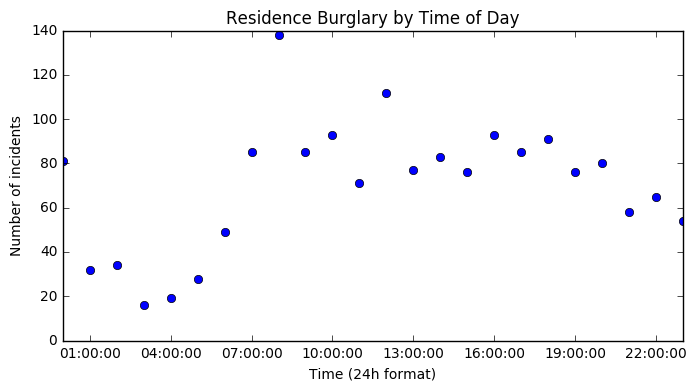

In [146]:
fig = plt.figure(figsize=(8,4));
plt.plot_date(residence_burglary.index, residence_burglary.values);
plt.title('Residence Burglary by Time of Day');
plt.xlabel('Time (24h format)');
plt.ylabel('Number of incidents');

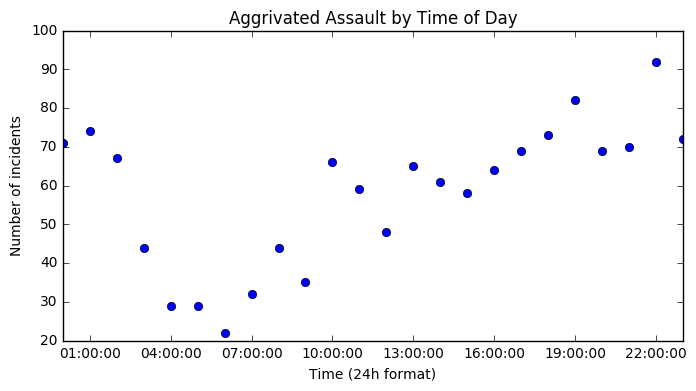

In [145]:
fig = plt.figure(figsize=(8,4));
plt.plot_date(assault.index, assault.values);
plt.title('Aggrivated Assault by Time of Day');
plt.xlabel('Time (24h format)');
plt.ylabel('Number of incidents');

### Are crimes seasonal?

In [125]:
# Let's take a closer look at a few selected examples of crime...
seasonal_vehicle_larceny = df[df['UC2 Literal']=='LARCENY-FROM VEHICLE'].resample('M', closed='right', on='occur_dt').offense_id.count()
seasonal_pedestrian_robbery = df[df['UC2 Literal']=='ROBBERY-PEDESTRIAN'].resample('M', closed='right', on='occur_dt').offense_id.count()
seasonal_residence_burglary = df[df['UC2 Literal']=='BURGLARY-RESIDENCE'].resample('M', closed='right', on='occur_dt').offense_id.count()
seasonal_assault = df[df['UC2 Literal']=='AGG ASSAULT'].resample('M', closed='right', on='occur_dt').offense_id.count()
seasonal_rape = df[df['UC2 Literal']=='RAPE'].resample('M', closed='right', on='occur_dt').offense_id.count()

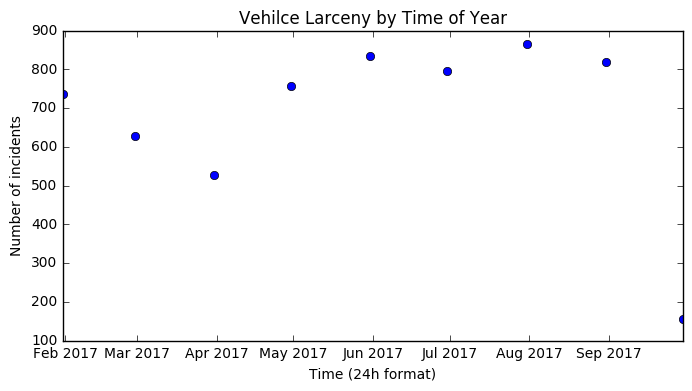

In [144]:
fig = plt.figure(figsize=(8,4));
plt.plot_date(seasonal_vehicle_larceny.index, seasonal_vehicle_larceny.values);
plt.title('Vehilce Larceny by Time of Year');
plt.xlabel('Time (24h format)');
plt.ylabel('Number of incidents');

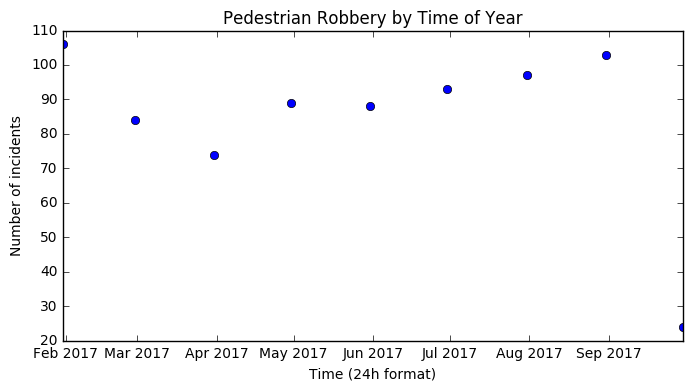

In [143]:
fig = plt.figure(figsize=(8,4));
plt.plot_date(seasonal_pedestrian_robbery.index, seasonal_pedestrian_robbery.values);
plt.title('Pedestrian Robbery by Time of Year');
plt.xlabel('Time (24h format)');
plt.ylabel('Number of incidents');

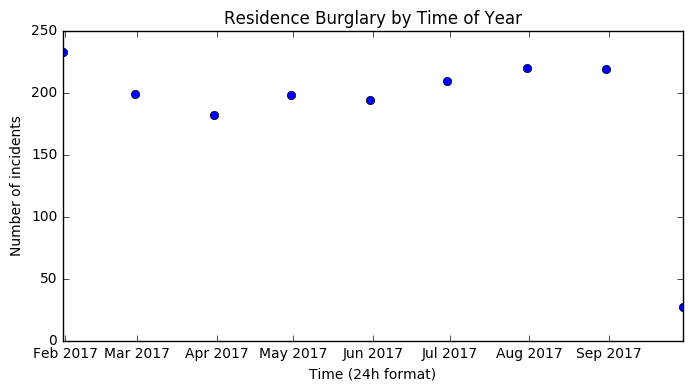

In [142]:
fig = plt.figure(figsize=(8,4));
plt.plot_date(seasonal_residence_burglary.index, seasonal_residence_burglary.values);
plt.title('Residence Burglary by Time of Year');
plt.xlabel('Time (24h format)');
plt.ylabel('Number of incidents');

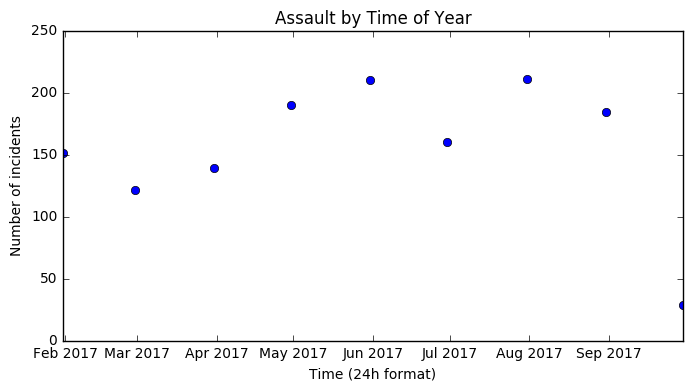

In [141]:
fig = plt.figure(figsize=(8,4));
plt.plot_date(seasonal_assault.index, seasonal_assault.values);
plt.title('Assault by Time of Year');
plt.xlabel('Time (24h format)');
plt.ylabel('Number of incidents');

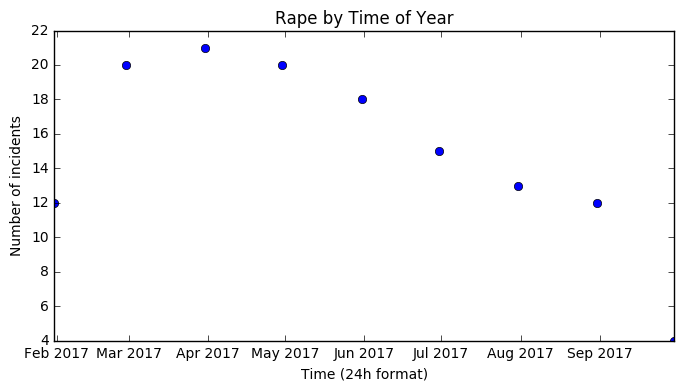

In [140]:
fig = plt.figure(figsize=(8,4));
plt.plot_date(seasonal_rape.index, seasonal_rape.values);
plt.title('Rape by Time of Year');
plt.xlabel('Time (24h format)');
plt.ylabel('Number of incidents');

# Descriptive Statistics
https://pandas.pydata.org/pandas-docs/stable/basics.html#descriptive-statistics

## Beats and Zones
The City of Atlanta is divided into 6 zones, each with 12 to 14 beats. 

![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cb/Atlanta_Police_Zones_-_Feb_2013.jpg/588px-Atlanta_Police_Zones_-_Feb_2013.jpg)

In [229]:
# let's create a colormap for the different colors...
crime_col = dict(zip(sorted(df['UC2 Literal'].unique()), 
                     ['red','olive','blue','black','black','royalblue','slategrey','purple','purple','darkblue','coral']))

In [221]:
crime_col

{'AGG ASSAULT': 'red',
 'AUTO THEFT': 'olive',
 'BURGLARY-NONRES': 'blue',
 'BURGLARY-RESIDENCE': 'black',
 'HOMICIDE': 'black',
 'LARCENY-FROM VEHICLE': 'royalblue',
 'LARCENY-NON VEHICLE': 'slategrey',
 'RAPE': 'orange',
 'ROBBERY-COMMERCIAL': 'purple',
 'ROBBERY-PEDESTRIAN': 'magenta',
 'ROBBERY-RESIDENCE': 'hotpink'}

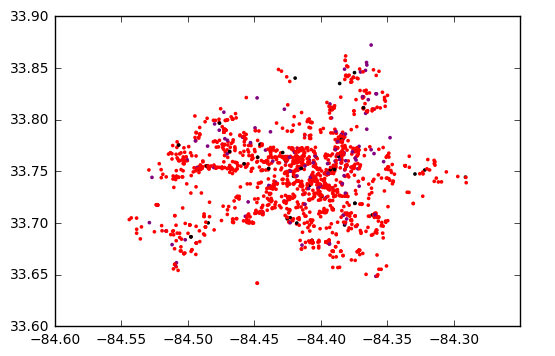

In [230]:
violent = df[df['UC2 Literal'].apply(lambda x: x in set(['AGG ASSAULT','HOMICIDE','RAPE']))]
plt.scatter(violent.x, violent.y, s=7, c=violent['UC2 Literal'].apply(lambda x: crime_col[x]), edgecolors='none')

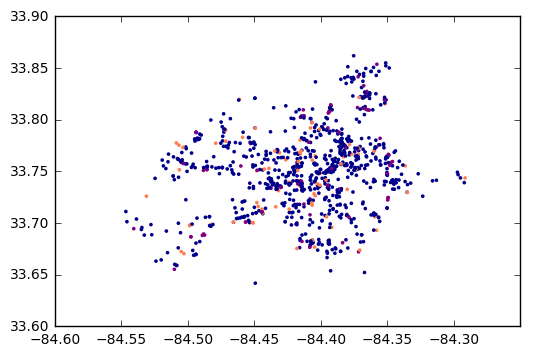

In [227]:
violent = df[df['UC2 Literal'].apply(lambda x: x in set(['ROBBERY-COMMERCIAL', 'ROBBERY-PEDESTRIAN', 'ROBBERY-RESIDENCE']))]
plt.scatter(violent.x, violent.y, s=7, c=violent['UC2 Literal'].apply(lambda x: crime_col[x]), edgecolors='none')

## Crimes by Zone

In the beat ID, the hundreds place indicates the zone number... 

Let's create a separate column for zone.

In [232]:
df['Zone'] = df['beat']//100

In [234]:
pd.DataFrame(df.groupby(['Zone','UC2 Literal']).offense_id.count())

offense_id
Zone UC2 Literal                     
1    AGG ASSAULT                  397
     AUTO THEFT                   333
     BURGLARY-NONRES               66
     BURGLARY-RESIDENCE           407
     HOMICIDE                      14
     LARCENY-FROM VEHICLE         573
     LARCENY-NON VEHICLE          479
     RAPE                          35
     ROBBERY-COMMERCIAL             9
     ROBBERY-PEDESTRIAN           143
     ROBBERY-RESIDENCE             23
2    AGG ASSAULT                   96
     AUTO THEFT                   378
     BURGLARY-NONRES              115
     BURGLARY-RESIDENCE           219
     HOMICIDE                       5
     LARCENY-FROM VEHICLE        1560
     LARCENY-NON VEHICLE         1146
     RAPE                          19
     ROBBERY-COMMERCIAL            23
     ROBBERY-PEDESTRIAN            89
     ROBBERY-RESIDENCE              5
3    AGG ASSAULT                  337
     AUTO THEFT                   452
     BURGLARY-NONRES               88
     BURGLARY-RESIDENCE           320
     HOMICIDE                      12
     LARCENY-FROM VEHICLE         732
     LARCENY-NON VEHICLE          483
     RAPE                          24
...                               ...
4    ROBBERY-PEDESTRIAN           142
     ROBBERY-RESIDENCE             22
5    AGG ASSAULT                  140
     AUTO THEFT                   254
     BURGLARY-NONRES               54
     BURGLARY-RESIDENCE            59
     HOMICIDE                       5
     LARCENY-FROM VEHICLE        1381
     LARCENY-NON VEHICLE          775
     RAPE                          24
     ROBBERY-COMMERCIAL             7
     ROBBERY-PEDESTRIAN           114
     ROBBERY-RESIDENCE              5
6    AGG ASSAULT                  114
     AUTO THEFT                   225
     BURGLARY-NONRES               87
     BURGLARY-RESIDENCE           256
     HOMICIDE                       4
     LARCENY-FROM VEHICLE        1066
     LARCENY-NON VEHICLE          729
     RAPE                          12
     ROBBERY-COMMERCIAL            13
     ROBBERY-PEDESTRIAN           121
     ROBBERY-RESIDENCE              9
7    AGG ASSAULT                    2
     AUTO THEFT                     4
     LARCENY-FROM VEHICLE          18
     LARCENY-NON VEHICLE          139
     RAPE                           1
     ROBBERY-PEDESTRIAN             1

[72 rows x 1 columns]